In [1]:
from typing import List, Dict, Iterable, Tuple, Callable
from matplotlib import pyplot as plt
from collections import Counter
import sys
import os
import string
import urllib.request
import requests
import curl
import pycurl
import webbrowser
import numpy as np
import math
import pandas as pd
from matplotlib.pyplot import figure
from py.xml import raw
from requests.api import get
from scipy.interpolate import make_interp_spline
import pylab

In [2]:
# Time & Sample

Ts = .1
T_start = 0.0
T_end = 20.0

# Number of samples
sample_range = np.linspace(T_start,T_end,int(T_end/Ts))
len(sample_range)



200

In [3]:
# Initial Variables

# Noise
signoise = 1

XH = 0
XDH = 0

# Omega
omega = .1

# Amplitude
amp = 1



In [4]:
# Setup steady-state matrices

# Noise
# rmat = signoise ** 2
rmat = np.eye(2) * (signoise ** 2)
# rmat = signoise

# Covariance
# P = np.diag((99999999999, 99999999999))
# P = np.diag((1,1))
P = np.zeros((2,2))

# Process Noise
phis = 1
Q0 = np.array([[(Ts**3)/3, (Ts**2)/2],[(Ts**2)/2, Ts]])
Q = phis * Q0

# System Matrix - State
phi = np.array([[np.cos(omega*Ts), np.sin(omega*Ts)/omega],[-omega*np.sin(omega*Ts), np.cos(omega*Ts)]])

# System Matrix - Input

# Measurment matrix
H = np.array([1,0])



63
63
62
0.1
0.09998586363834151
0.09994345855010048


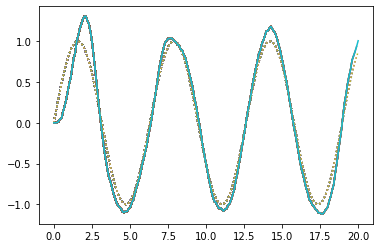

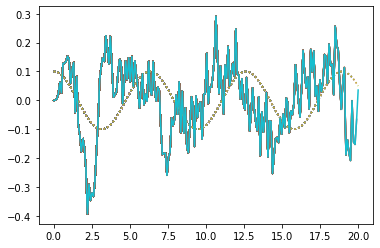

In [5]:
# Run Kalman filter

x0 = []
x_org = []
x_dot = []
xh_1 = []
xdh_1 = []
res_0 = []
IDN = np.eye(2)
samp_range = []
x_err_x = []
x_err_x_dot = []
phi_mat_x = []
phi_mat_x_dot = []
for i in range(0,len(sample_range)):

    # Solve for M
#     PHIP = np.dot(phi,P)
#     PHIPPHIT = np.dot(PHIP,phi.T)
#     M = PHIPPHIT + Q
    M = np.dot(np.dot(phi,P),phi.T) + Q
    
    #Solve for Kalman Gain
    HM = np.dot(H,M)
    HMHT = np.dot(HM,H.T)
    HMHTR = HMHT + rmat
    S = np.dot(np.dot(H,M),H.T) + rmat
#     print(HMHTR)
#     HMHTRINV = 1/HMHTR[0,0]
#     print(HMHTRINV)
#     HH2 = np.linalg.inv(HMHTR)
#     print(HH2)
    HH2 = np.linalg.inv(S)
    MHT = np.dot(M,H.T)
    K = np.dot(MHT,HH2)
#     print(K)
    # Process Noise
#     KH = np.dot(K,H)
    IKH = IDN-np.dot(K,H)
    P = np.dot(IKH,M)
    
    # Setup plots with noise
    X = amp*np.sin(omega*i)
    x_org.append(X)    
    XD = amp*omega*np.cos(omega*i)
    x_dot.append(XD) 
    XS = X + np.random.normal(0, omega)
    x0.append(XS)
    
    samp_range.append(sample_range[i])
    
#     plt.plot(samp_range, x_org, linestyle = ":")
#     plt.grid()

    XHOLD = XH
    
    RES = XS-(XH*np.cos(omega*Ts))-((np.sin(omega*Ts)*XDH)/omega)
    
    # RES v2
    RES2 = XS - np.dot(np.dot(H,phi),XHOLD)
    
    XH = np.cos(omega*Ts)*XH + (XDH*(np.sin(omega*Ts)/omega)) + K[0]*RES
    xh_1.append(XH)
    
#     plt.plot(samp_range,xh_1)
    
    XDH = (-omega*np.sin(omega*Ts)*XHOLD) + (XDH*(np.cos(omega*Ts))) + K[1]*RES
    xdh_1.append(XDH)
    
        
#     plt.plot(samp_range,xdh_1)
    
    sinus = 0
    

    phi_0 = np.dot(phi,XH)
    phi_1 = phi_0[:,0] + K*RES
#         phi_2 =  phi_0[:,1] + K*RES2
#     phi = np.dot(phi,XH) + K*RES
    phi_mat_x.append(phi_1[0])
#         plt.plot(samp_range,phi_mat)
    plt.figure(1)
    plt.plot(samp_range, x_org, linestyle = ":")
    plt.plot(samp_range,phi_mat_x) 
#     plt.plot(samp_range,xh_1)
    plt.grid
#     phi_0 = np.dot(phi,XH)
#     phi_1 = phi_0[:,0] + K*RES
#         phi_2 =  phi_0[:,1] + K*RES2
#     phi = np.dot(phi,XH) + K*RES
    phi_mat_x_dot.append(phi_1[1])
#         plt.plot(samp_range,phi_mat)
    plt.figure(2)
    plt.plot(samp_range, x_dot, linestyle = ":")
    plt.plot(samp_range,phi_mat_x_dot) 
#     plt.plot(samp_range,xdh_1)
    plt.grid
    
    # Error
    x_err_0 = (abs(phi_1[0]) - abs(X))
    x_err_x.append(x_err_0)
    x_err_1 = (abs(phi_1[1]) - abs(XD))
    x_err_x_dot.append(x_err_1)
    plt.grid()
    


#     plt.figure(2)
#     plt.plot(samp_range, x_err)
    
#     plt.plot(samp_range,xdh_1)
    
#     a = sample_range[i]

# plt.plot(sample_range,x_org,sample_range,x0, linestyle=":")
# plt.plot(sample_range,xh_1, color='red', linestyle="--")
# print(np.dot(phi,XH))
# print(np.cos(omega*Ts)*XH + (XDH*(np.sin(omega*Ts)/omega)))
# print(phi_1[0])

o = 0
oo = o + 1
aaa = max(x_dot)
# print(aaa)
x_dot.count([aaa])
pp1 = 3
cnt = []
cnt1 = []
for j in range(0,len(sample_range)):
    if x_dot[j] == aaa and j < len(sample_range)-1:
        cnt.append(x_dot[j])
        pp = x_dot.index(aaa) 
        cnt1.append(pp)
#         print(pp)
        pp0 = pp 
#         print(pp0)
#         pp1 = pp0 - pp
#         print(pp1)
#         pp2 = pp1 + pp
#         print(pp2)
        aaa = max(x_dot[pp+1:])
#         print(aaa)
#         plt.scatter(pp,aaa)
#         aaa = max(x_dot[(j+1):len(sample_range)])
# x_dot[1:].index(aaa)
cnt1

aw_cnt = 0
for k in range(1,len(cnt1)):
    aw = cnt1[k] - cnt1[k-1]
#     print(aw)
    if aw <= 1:
        break
    print(aw)
    aw_cnt += 1
aw_cnt

for l in range(0,aw_cnt):
    print(cnt[l])



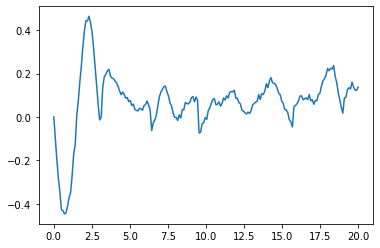

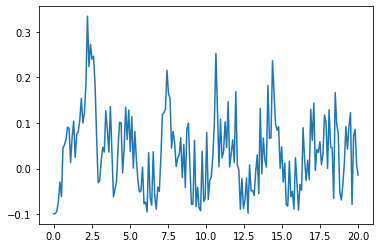

In [6]:
plt.figure(1)
plt.plot(sample_range, x_err_x)
plt.figure(2)
plt.plot(sample_range, x_err_x_dot)

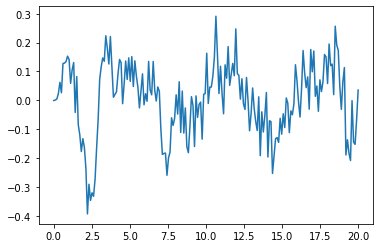

In [7]:
plt.plot(sample_range,phi_mat_x_dot)

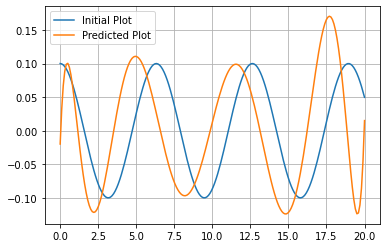

In [8]:
# Matrix Size: Degree of Polynomial
poly_deg = aw_cnt * 3
mat_size = poly_deg + 1

# Create dummy matrix
a = np.ones((mat_size,mat_size))
b = np.ones((mat_size,1))

#%%
# Create Input & Output arrays

# Create output values
y = phi_mat_x_dot
# for i in range(0,row_data):
#     y.append(dataset.iloc[i,7])

# Create input values
# len_Jan = len(y)
x = sample_range
actual_x = x

# Normalize input array
# Mean
meanX = np.mean(x, axis=0)
# meanY = np.mean(y_Jan, axis=0)
# Standard Deviation
stdX = np.std(x, axis = 0)
x = (x- meanX) / stdX
# Variance
varX = np.var(y)

# print(x)

#%%
# Create design matrix
for i in range(0,mat_size):
    for j in range(0,mat_size):
        a[i][j] = sum(np.power(x,(i+j)))

# Create matrix
amat = np.mat(a)

# print(a)
# print(a[0][0])

# Create design output
for k in range(0, mat_size):
    b[k] = sum(np.power(x,k) * y)

#%%
# Calculate coefficients
# Inverse input matrix
amat_inv = np.linalg.pinv(amat)
z = amat_inv * b
# Transpose coefficient vector
zz = z.T
# Reverse index list
z3 = zz[::-1]
# print("z3: ", z3)

#%%
# Predict values

# Create list
x_list = sample_range
x = x_list
# Normalization
x = (x - meanX) / stdX

# Create dummy array
J = np.ones((len(x), 1))
cost = np.ones((len(x),1))
vec_out = np.ones((mat_size, 1))
# Solve for predicted values
for q in (range(len(x))):
    for p in range(0, mat_size):
        vec_out[p] = x[q] ** p
    # Algebraic vector
    vec_out = np.matrix(vec_out)
    # Matrix multiplication
    l = np.matmul(z3,vec_out)
    J[q] = l
    # Cost Function
    cost[q] = (1/(2 * len(x))) * np.sum(np.square(J[q] - vec_out))

# print("vec out: ", vec_out)
#%%

# # Create vector of input terms
# x_list = list(range(0,324))
# x = x_list
# # Normalization
# x = (x - meanX) / stdX

# # Create dummy array
# J_tot = np.ones((len(x), 1))
# cost = np.ones((len(x),1))
# vec_out = np.ones((mat_size, 1))
# # Solve for predicted values
# for q in (range(len(x))):
#     for p in range(0, mat_size):
#         vec_out[p] = x[q] ** p
#     # Algebraic terms
#     vec_out = np.matrix(vec_out)
#     # Matrix multiplication
#     o = np.matmul(z3,vec_out)
#     # print(o)
#     # Alternative method
#     # J_tot[q] = np.random.normal(o,varX ** 2,1)
#     # J_tot[q] = np.random.randn(1) * (varX ** 2) + o
#     J_tot[q] = np.sum(np.random.randn(mat_size)) * (varX ** 2) + o
#     # Cost function
#     cost[q] = (1/(2 * len(x))) * np.sum(np.square(J_tot[q] - vec_out))

# # Convert from array to list
# J_tot_list = J_tot.tolist()

# # Create dummy array
# J_tot_smooth = np.ones((len(x), 1))
# cost_smooth = np.ones((len(x),1))
# vec_out = np.ones((mat_size, 1))
# # Solve for predicted values
# for q in (range(len(x))):
#     for p in range(0, mat_size):
#         vec_out[p] = x[q] ** p
#     # Alebraic terms
#     vec_out = np.matrix(vec_out)
#     # Matrix multiplication
#     l = np.matmul(z3,vec_out)
#     # Solve to create smoothen curve
#     J_tot_smooth[q] = l
#     # Cost function
#     cost_smooth[q] = (1/(2 * len(x))) * np.sum(np.square(J_tot_smooth[q] - vec_out))
    
# Actual & Predicted values
plot1 = plt.figure(1)
plt.plot(actual_x, x_dot)
plt.plot(x_list, J)
# plt.plot(sample_range,phi_mat_x_dot)
# plt.plot(x_list, J_tot_smooth)
plt.legend(["Initial Plot", "Predicted Plot", "Predicted Trendline"])
plt.grid()

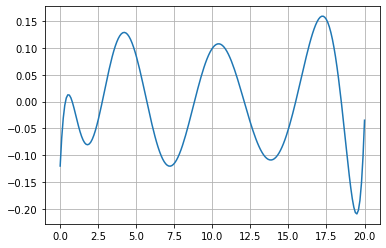

In [9]:
# Initialize error array
y = x_dot
error = []
for i in range(0,len(J)):
    pred_error = J[i]
    actual_error = y[i]
    err = pred_error - actual_error
    error.append(err)
    
# Error plot
plot3 = plt.figure(3)
plt.plot(sample_range,error)
plt.grid()


In [10]:
x_new = np.linspace(T_start,T_end, 300)
a_BSpline = make_interp_spline(sample_range, phi_mat_x_dot)
y_new = a_BSpline(x_new)

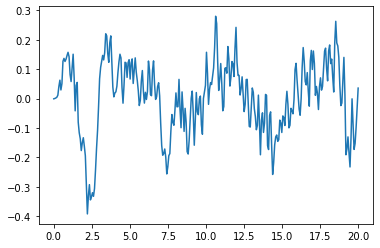

In [11]:
plt.plot(x_new, y_new)

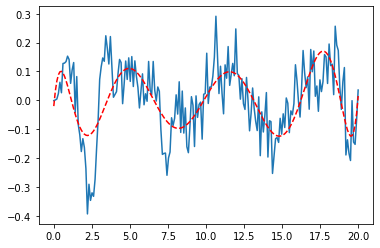

In [12]:
x = sample_range
z = np.polyfit(sample_range, phi_mat_x_dot, 9)
p = np.poly1d(z)
plt.plot(sample_range, phi_mat_x_dot)
pylab.plot(x,p(x),"r--")